# Iris flower data analysis

### Author : Vlad Turculetu

### Table of Contents

[Introduction](#header1)

[Data distribution](#header2)

[Feature distribution across species](#header3)

[Data across variables](#header4)

[Conclusion](#header5)

# Introduction <a class="anchor" id="header1"></a>
The purpose of this paper is to conduct an investigation into data from the flowe IRIS. Data provided is quite limited, however it only tracks two characteristics:

1. Petals - length and width

2. Sepal - length and width

Data is tracked across three species of IRIS flower, and to be be more exact, those species are :

1. Iris setosa
2. Iris virginica
3. Iris versicolor 

Due to the the limited size of variables, the number of plots is limited. We will attempt to first identify behaviour of variables with one another (every variable plotted against one another). After that, we can attempt to take a closer look at the underlying trends betwen sepal and petal. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data distribution  <a class="anchor" id="header2"></a>


As with any database, it is important to understand the data and how its distributed. With a first glance, it can be seen that data in all petal (length & width)  and sepal (length & width) has no missing data; all coloumns have a count of 150 data points.  This is later confirmed by using the following code:

```python
data.isna().sum()
```

It is now clear that all data is present and no extra effort needed to fill in missing data. 

Another important aspect of the data is the relation of mean and median of each feature. 

|-|Sepal length | Sepal width | Petal length | Petal width |
|-------------|-------------|-------------|-------------|-------------|
|Mean| 5.84|3.05|3.76|1.2|
|Median| 5.8|3|4.3|1.3|

By looking at the variation of mean and median, we can deduct is outliers are present present in the data. For sepal length and width, both values are very close therefore the data is not expected to have outliers.  Petal width is also where , median and mean are closely tracked, therefore outliers are not expected. 

However, for petal length it's a different story; there appears to be a large disrepancy between the two values. The shows the data is skewed to one side. The presence of anomalies is not guarranteed, however further investigation is needed

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Petal length by species')

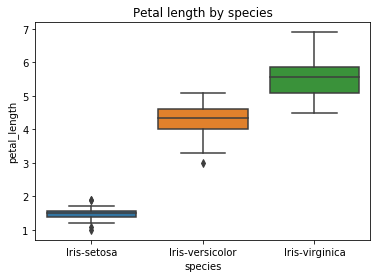

In [6]:
sns.boxplot(data=data, x='species',y='petal_length')
plt.title('Petal length by species')

Text(0.5, 1.0, 'Petal width by species')

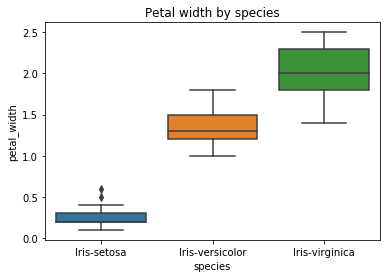

In [7]:
sns.boxplot(data=data,x='species',y='petal_width')
plt.title('Petal width by species')

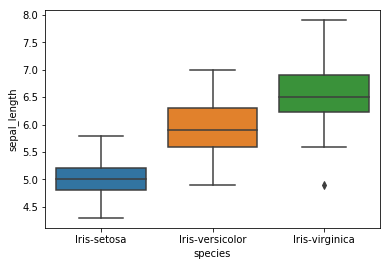

In [8]:
sns.boxplot(data=data,x='species',y='sepal_length')

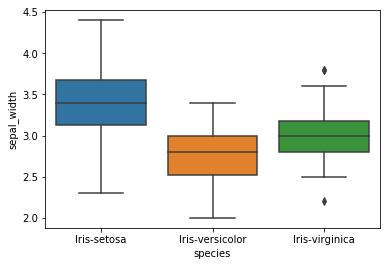

In [9]:
sns.boxplot(data=data,x='species',y='sepal_width')

In [10]:
data.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [11]:
data.groupby(['species']).median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


# Feature distribution across species <a class="anchor" id="header3"></a>

Box plots with whiskers is a values tool data distributions. Essentially, these sort of plots showcase variables already discussed above ( mean, median, outliers, etc); they do so in a visual format which happens to be much easier on the eye and better for presentation. 

In the last text above, we have looked and analysed data on a coloumn by column basis ( or features) , box plots plotted above go a step further. In these plots we are breaking down statistical analysis on a species by species basis.  This sort of plot allows us to better understand the behaviour of individual species of IRIS and how its distributed about its median

What is apparent immediately is that in sepal length, petal width and petal length, Iris-setosa has the lowest median value by far. In sepal length the difference in mean is 1mm ( to the next species), in petal length is 2.8mm and in petal width is 1.08mm. A similar story is seen with the median. Iris species setosa does seem to have the lowest values for all the features, with the exception of sepal width; where as seen above, Iris setosa has the largest man and median values.  Therefore it can be said that on average, Iris setosa have the widest sepals.

Furthermore looking at the box plots, it can also be seen that there are a few outliers present in almost every set of data (in plots, outliers are shown as dots ). As it was described earlier, both the mean and median were relatively close and not too many outliers were expected; however by breaking down the data into species, a number of outliers seem to emerge. With the presence of these outliers, data could perhaps be skewed, however more analysis needs to be conducted. 

**Note: With the plotting function, outliers are considered if the data point is sitting outside of the 3rd quantile**


/home/vlad/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


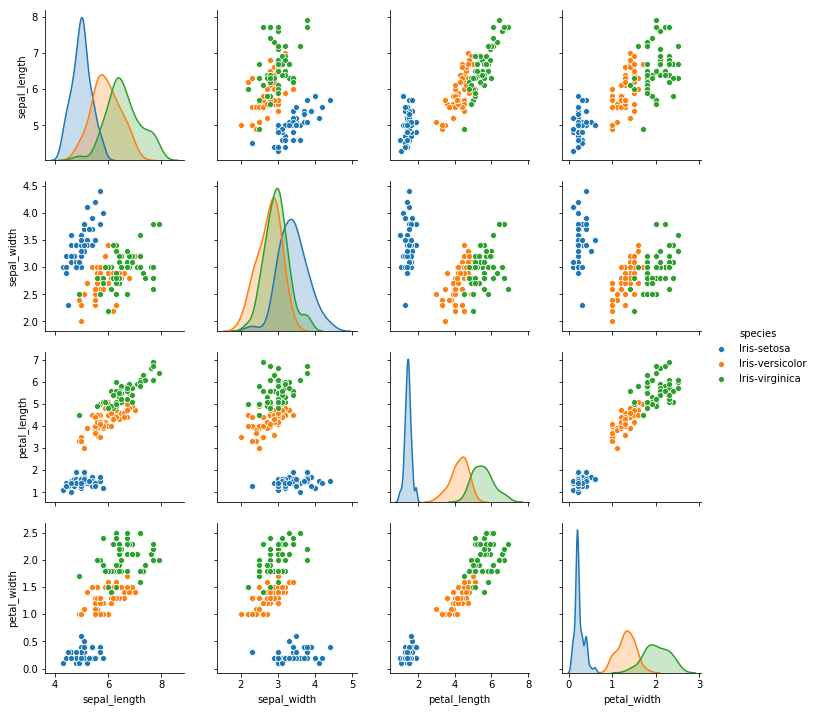

In [12]:
sns.pairplot(data=data, hue='species')

# Data across variables <a class="anchor" id="header4"></a>

In the plot above, each numerical variable was plotted against the other across each of the three species. This method of plotting is favourable offering good visual representation of the relationships. 

As seen in the top right plots, Iris setosa petal length and petal width are seen to be independent of sepal length or width. From the plots, it is clear that irrespective of petal behaviour, sepal measurments are not affected. An increase in length or width does not equate to an increase in sepal with or length. 

However, while Iris setosa apprears to be independent, the other two species ( versicolor and virginica) apprear to have a positive correlation between sepal and petal. The degree of this correlation isn't 100% clear at this stage, therefore more analysis is required.

And lastly, petal width and petal length do appear to have a strong correlation ( with the exception of species setosa). From the plot, it is clear that increasing  petal width does result in increasing petal length. For sepal, this trend is not as apparent; data appears to be at random. 

Moving forward, relationships between variables should be looked at more closely. As it was stated in this section, a number of variables appear to have positive correlation however this needs to be investigated before drawing and conclusions.

/home/vlad/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


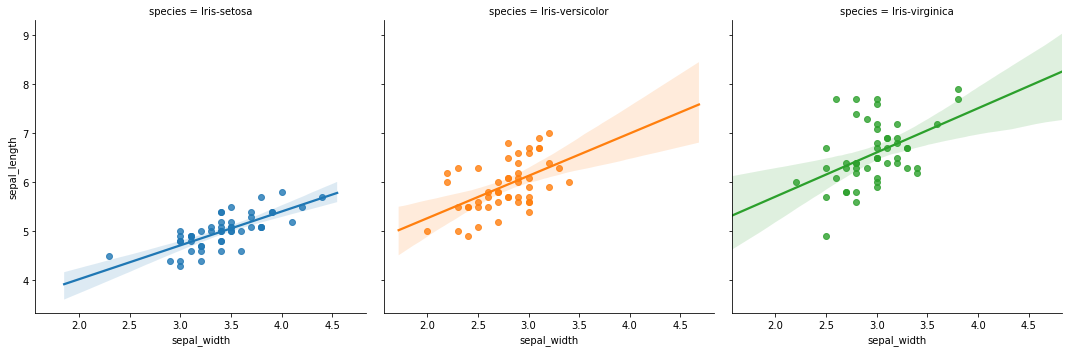

In [13]:
sns.lmplot(data=data,x='sepal_width',y='sepal_length',col='species',hue='species')

/home/vlad/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


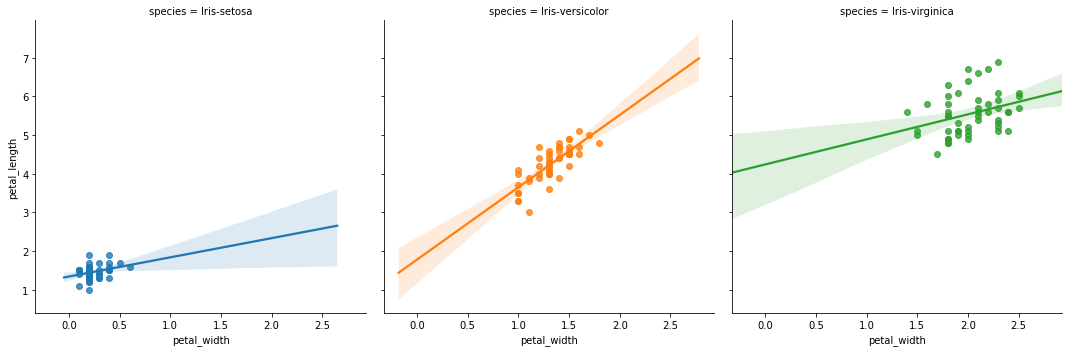

In [14]:
sns.lmplot(data=data,x='petal_width',y='petal_length',col='species',hue='species')

/home/vlad/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


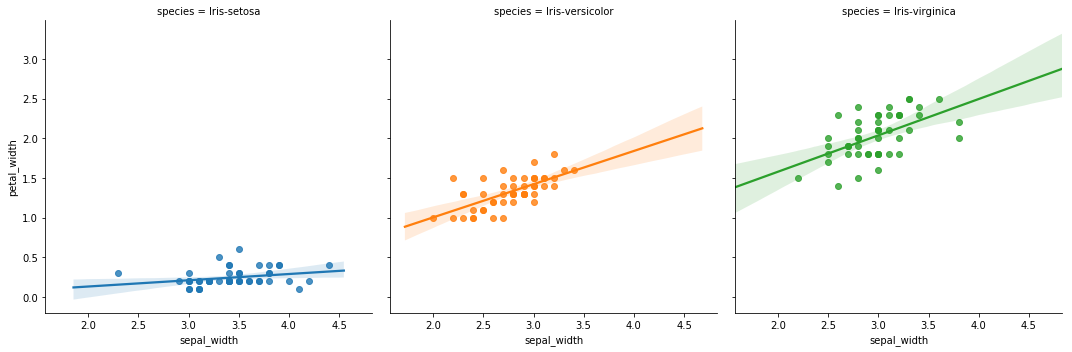

In [15]:
sns.lmplot(data=data, x='sepal_width',y='petal_width',col='species',hue='species')

/home/vlad/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


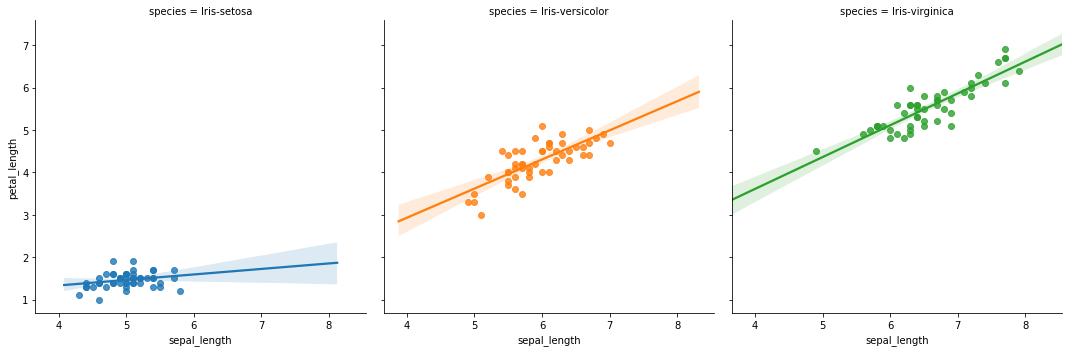

In [16]:
sns.lmplot(data=data,x='sepal_length',y='petal_length',col='species',hue='species')

/home/vlad/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


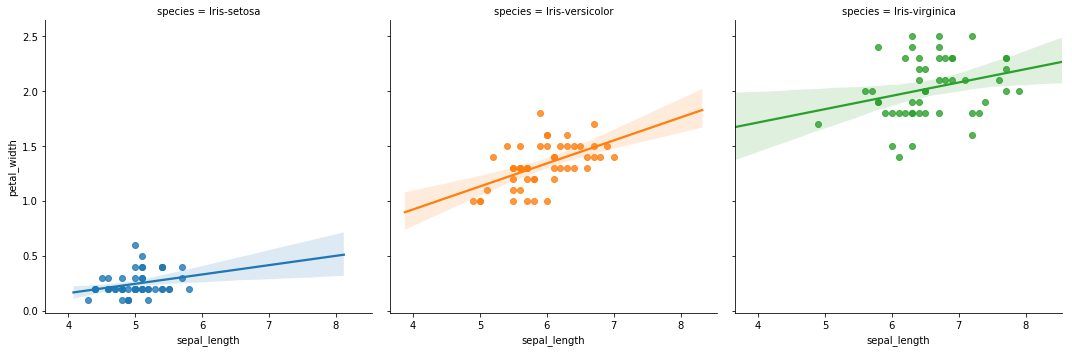

In [17]:
sns.lmplot(data=data,x='sepal_length',y='petal_width',col='species',hue='species')

/home/vlad/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


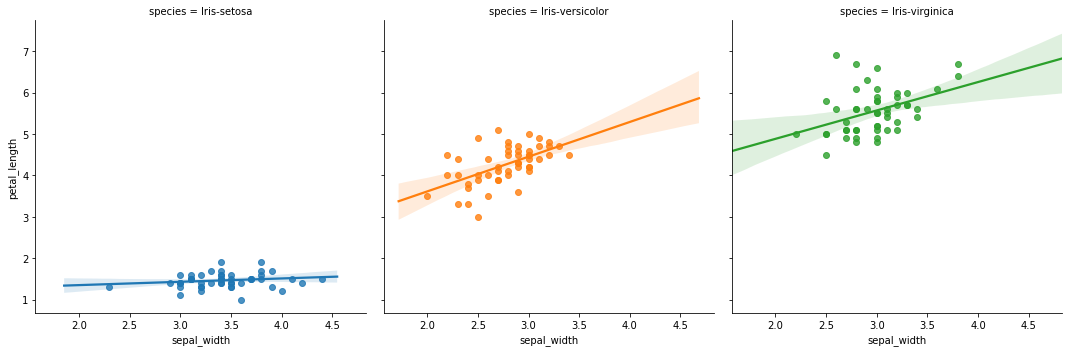

In [18]:
sns.lmplot(data=data,x='sepal_width',y='petal_length',col='species',hue='species')

# Conclusion <a class="anchor" id="header5"></a>


As it was predicted, species setosa has very little correlation between features (except sepal witdh and sepal length). This can be seen by the near horizontal line present in all the plots above; all data points are 'bunched' in and around one area. The once exception to this rule is sepal width vs sepal length. Seen in the plot, increasing sepal width does result in increasing sepal length. This was what was expected. In reality, a longer sepal is expected to have a wider sepal. Therefore based on all this data, it can safely be said that for the species of Setosa, petals and sepals grow independently of each other; i.e. at seemngly random values. However this conclusion only applies for the species of setosa.

For species Versicolor trends appear to be much more strongly shown. From the top 3 plots, there appears to be a strong correlation between petal length and sepal length, as well as petal width and sepal width. This doesn't stop there. As seen in the last three plots, there appears to be a positive correlation between features. Increasing length does result in increasing width both in sepal and petal. This is very much against species setosa. Therefore based on all the data and analysis, it can safely be said that for versicolor, sepals and petals are diretly linked in both length and width.

Lastly, Virginica is similar to versicolor with weaker correlation between features with one exception ( sepal lengh vs petal width). For sepal width vs petal width, there appears to be a very slight correlation; however an argument can be made for a randomness spread in the values.  